In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import collections, math

import matplotlib.pyplot as plt
%matplotlib inline 

In [17]:
#crop test images and cache to TEST_CROP_DIR by detections_full.pkl and RFCN/ImageSets/Main/test.txt
FISH_CLASSES = ['NoF', 'ALB', 'BET', 'DOL', 'LAG', 'OTHER', 'SHARK', 'YFT']

import pickle 
with open('../data/RFCN_detections/detections_full_resnet101_rfcn_ohem_iter_30000.pkl','rb') as f:
    detections_full = pickle.load(f, encoding='latin1') 
    
CONF_THRESH = 0.9
outputs = []
count = np.zeros(len(detections_full[0]))

for im in range(len(detections_full[0])):
    outputs_im = []
    detects_im = []
    for cls in range(1,len(FISH_CLASSES)):
        detects_im_cls = detections_full[cls][im]
        for i in range(len(detects_im_cls)):
            if np.max(detects_im_cls[i,4+cls]) >= CONF_THRESH:
                outputs_im.append(detects_im_cls[i,:]) 
    count[im] = len(outputs_im)
    for cls in range(1,len(FISH_CLASSES)):  
        detects_im.append(detections_full[cls][im])
    detects_im = np.vstack(detects_im)
    if len(outputs_im) == 0:
        ind = np.argmax(np.max(detects_im[:,5:], axis=1))
        outputs_im.append(detects_im[ind,:])
    outputs_im = np.asarray(outputs_im)
    outputs.append(outputs_im)

print(sum([outputs[i].shape[0] for i in range(len(outputs))]))

5984


In [18]:
collections.Counter(count)

Counter({0.0: 723,
         1.0: 3234,
         2.0: 592,
         3.0: 137,
         4.0: 53,
         5.0: 19,
         6.0: 13,
         7.0: 2,
         8.0: 3,
         9.0: 1})

In [26]:
np.where(count==2)[0][:10]

array([ 3,  8,  9, 11, 12, 16, 41, 51, 52, 53])

In [ ]:
diff = [count9[i]==0 and count5[i]>1 for i in range(4777)]
ims_diff = []
for i in range(4777):
    if diff[i] == True:
        ims_diff.append(i)

ims_diff

[[  6.10271606e+02   1.97283905e+02   9.62016968e+02   4.31801544e+02
    2.75402388e-04   9.99508739e-01   1.94741078e-04   8.80224889e-08
    3.51423779e-07   1.92895932e-05   1.39052901e-07   1.36287781e-06]
 [  6.73075928e+02   1.09347534e+02   1.00431995e+03   2.29556213e+02
    1.38710209e-04   9.99382854e-01   1.62361772e-04   3.20736467e-06
    1.74283957e-06   3.00128188e-04   1.35484186e-06   9.69768553e-06]]
[[  6.89170898e+02   3.49424347e+02   8.07973145e+02   4.67115936e+02
    3.39192175e-03   9.95045424e-01   1.43846919e-04   3.61161838e-05
    4.38126699e-05   1.47311235e-04   1.21868115e-05   1.17939722e-03]
 [  4.72384766e+02   5.52831116e+02   6.71234985e+02   7.18426819e+02
    7.10476143e-03   9.91718888e-01   6.41367842e-06   5.22598555e-07
    4.12183726e-06   1.16271933e-03   6.11876374e-07   1.98721159e-06]]
[[  6.67574707e+02   4.38275360e+02   1.05130762e+03   7.19000000e+02
    2.10661311e-02   5.41072041e-05   2.10547441e-04   2.10712060e-05
    9.78305995

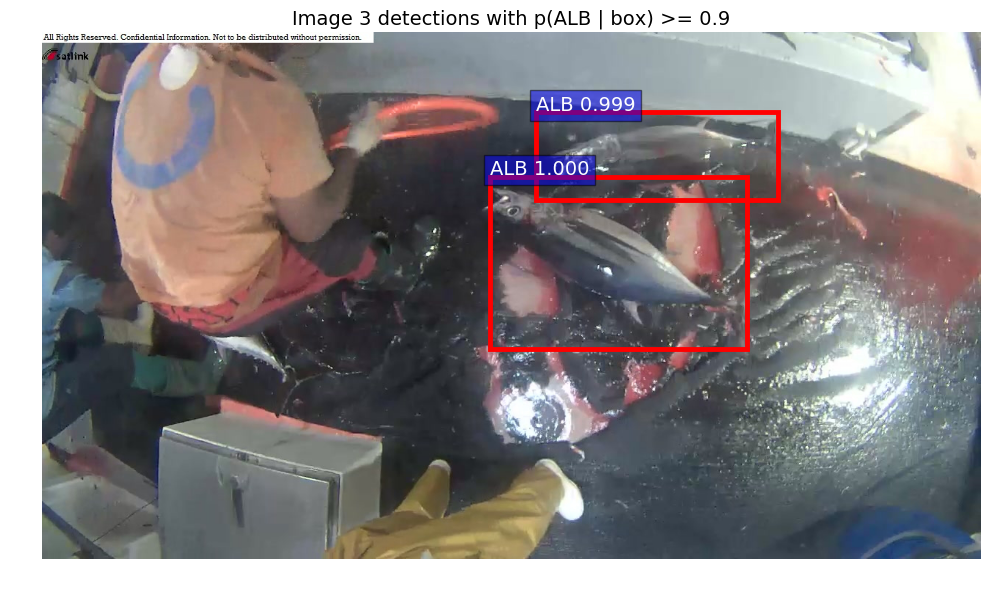

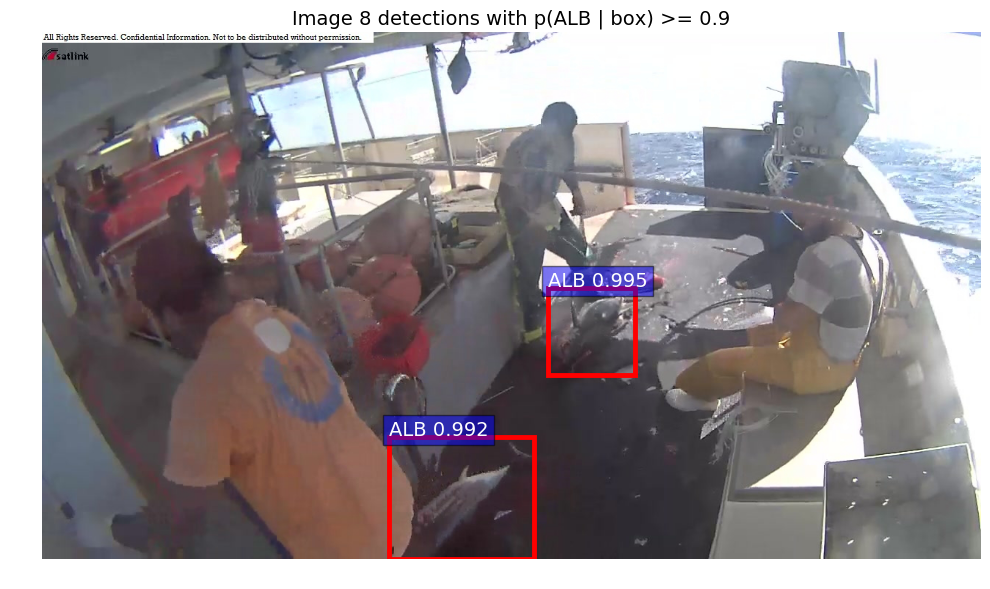

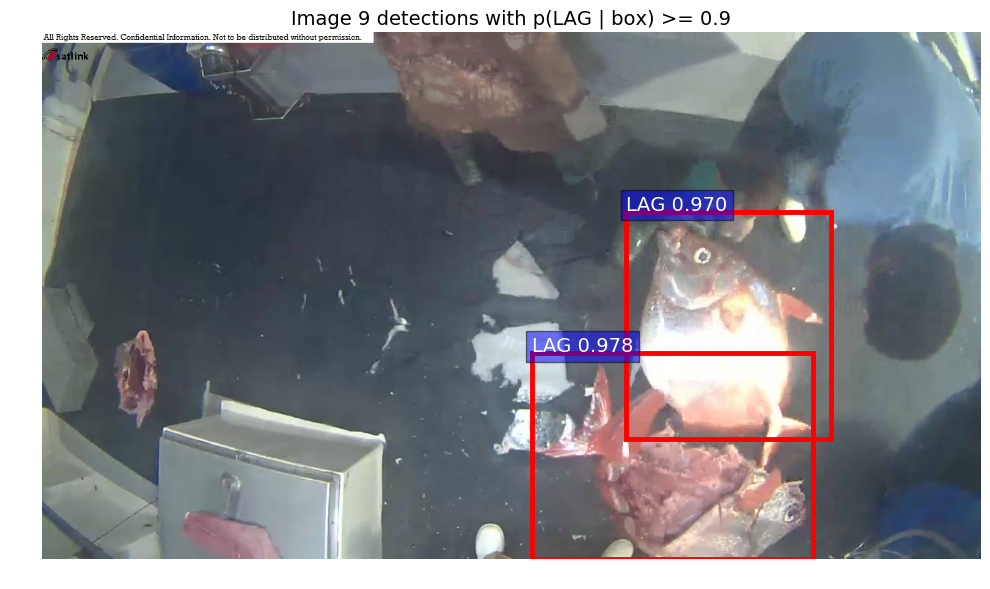

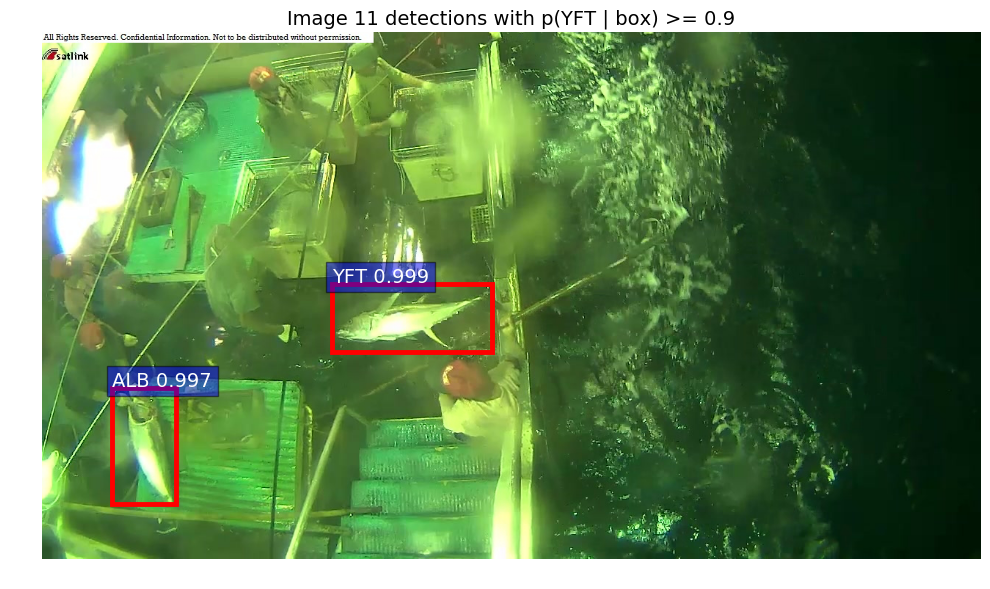

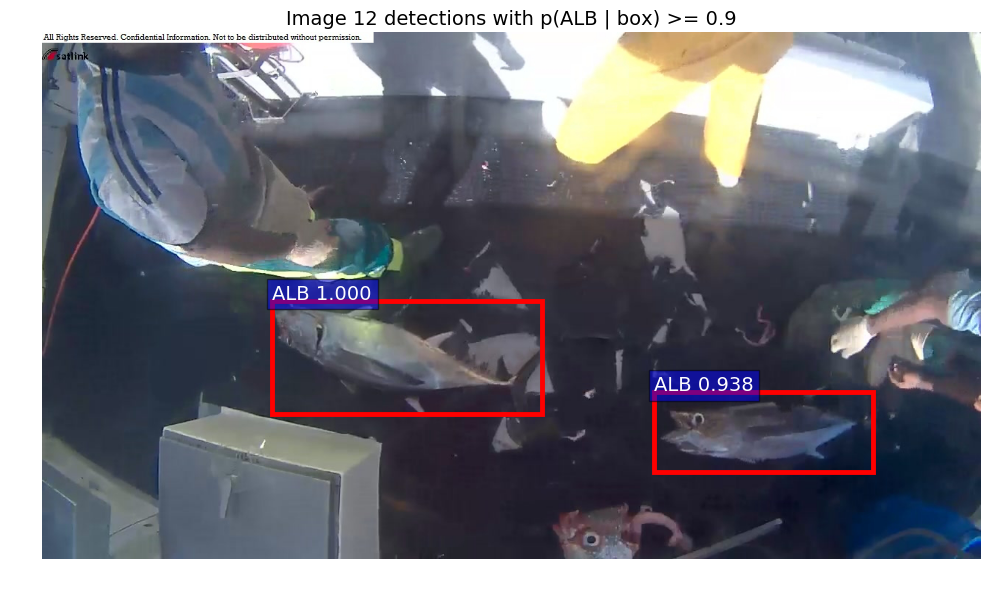

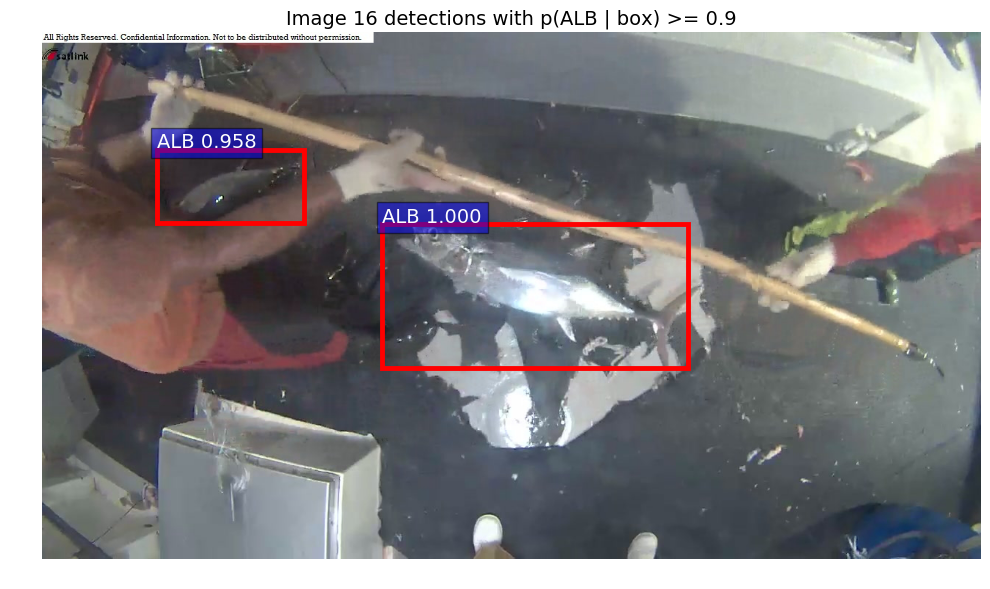

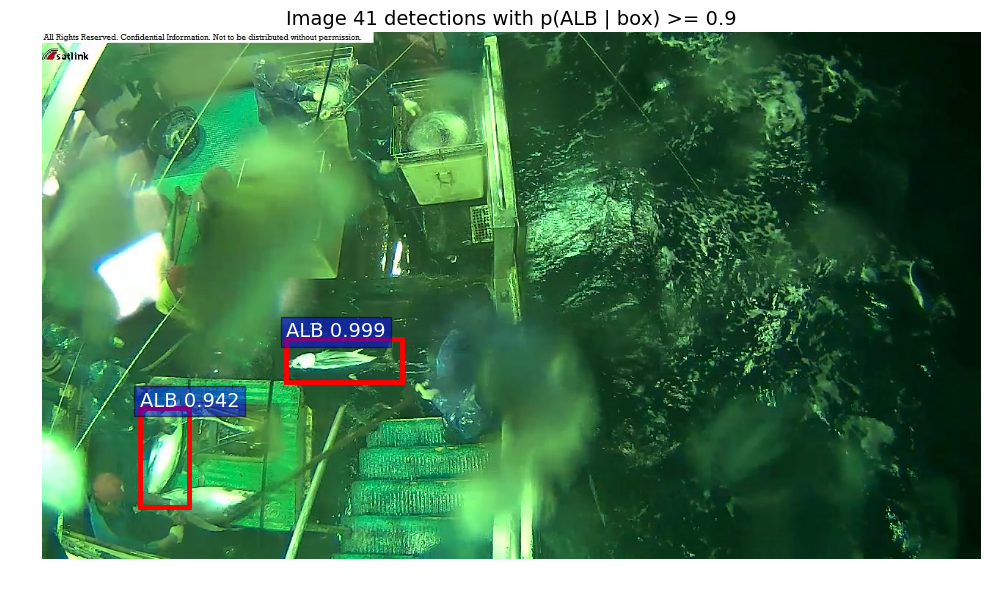

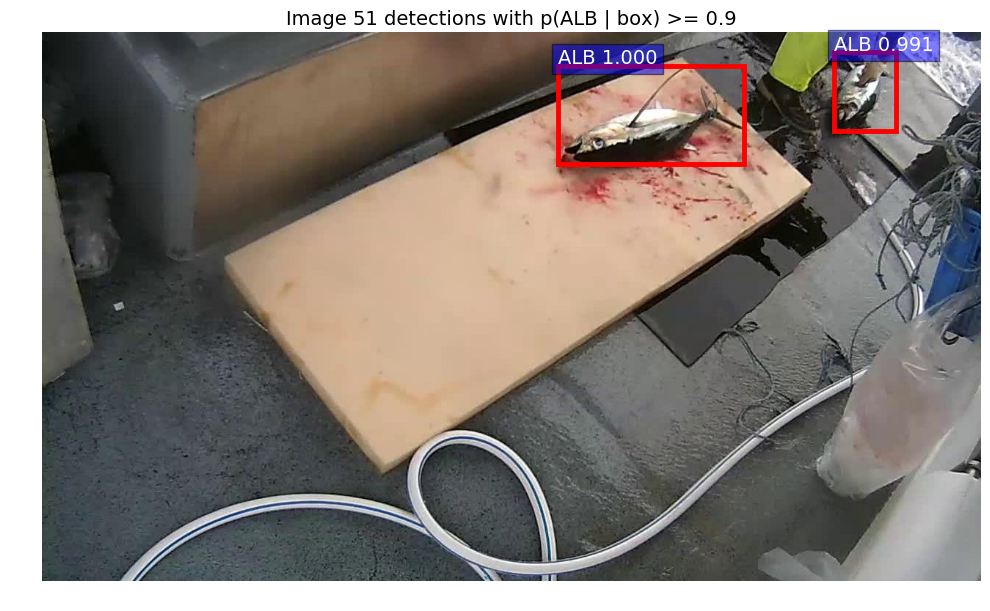

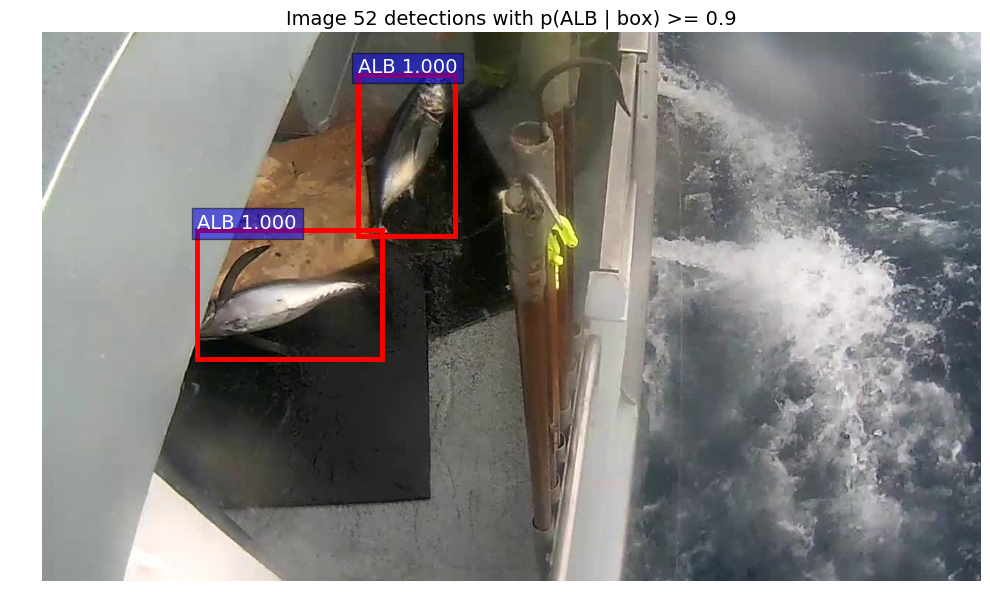

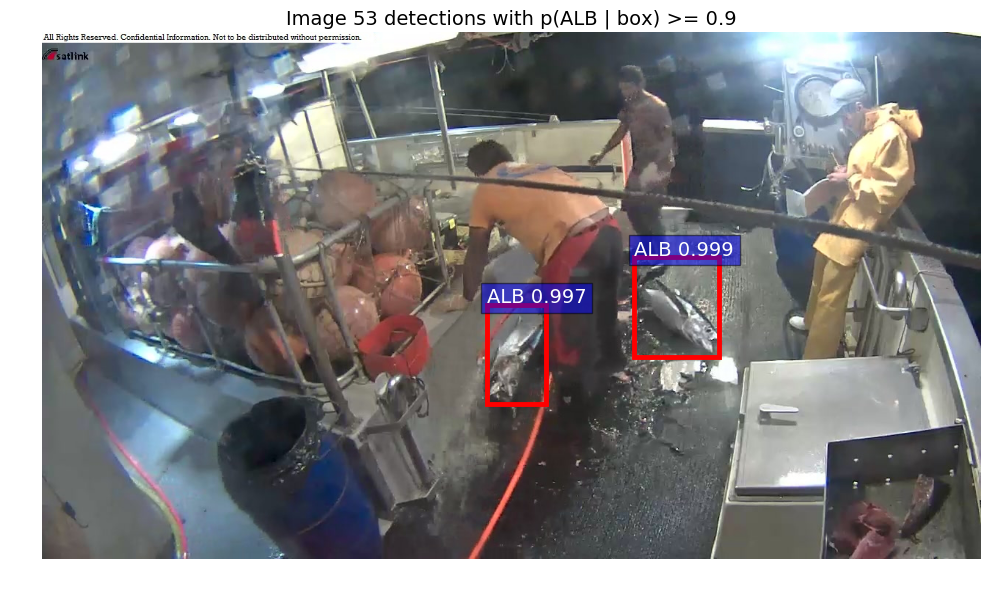

In [27]:
#visualize test image crop
FISH_CLASSES = ['NoF', 'ALB', 'BET', 'DOL', 'LAG', 'OTHER', 'SHARK', 'YFT']

with open("../RFCN/ImageSets/Main/test.txt","r") as f:
    ims = f.readlines()
test_files = [im[:-1]+'.jpg' for im in ims]

for j in np.ndarray.tolist(np.where(count==2)[0][:10]):
    dets = outputs[j]
    print(dets)
    im = Image.open("../RFCN/JPEGImages/"+test_files[j])
    im = np.asarray(im)
    #im = im[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(im, aspect='equal')
    for i in range(dets.shape[0]):
        bbox = dets[i, :4]
        score = np.amax(dets[i,4:])
        index = np.argmax(dets[i,4:])
        class_name = FISH_CLASSES[index]
        #if not (bbox[0] == 0 and bbox[1] == 0 and bbox[2] == 0 and bbox[3] == 0):
        ax.add_patch(plt.Rectangle((bbox[0], bbox[1]),
                          bbox[2] - bbox[0],
                          bbox[3] - bbox[1], fill=False,
                          edgecolor='red', linewidth=3.5))
        ax.text(bbox[0], bbox[1] - 2,
                '{:s} {:.3f}'.format(class_name, score),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=14, color='white')

    ax.set_title(('Image {} detections with '
                  'p({} | box) >= {:.1f}').format(j, class_name, CONF_THRESH),fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.draw()

In [29]:
#submission from detections_full.pkl
FISH_CLASSES = ['NoF', 'ALB', 'BET', 'DOL', 'LAG', 'OTHER', 'SHARK', 'YFT']

import pickle 
with open('../data/RFCN_detections/detections_full_resnet101_rfcn_ohem_iter_30000.pkl','rb') as f:
    detections_full = pickle.load(f, encoding='latin1') 
    
CONF_THRESH = 0.95
outputs = np.ndarray((len(detections_full[0]), len(FISH_CLASSES)), dtype=np.float64)

for im in range(len(detections_full[0])):
    outputs_im = []
    detects_im = []
    for cls in range(1,len(FISH_CLASSES)):
        detects_im_cls = detections_full[cls][im]
        for i in range(len(detects_im_cls)):
            if np.max(detects_im_cls[i,4+cls]) >= CONF_THRESH:
                outputs_im.append(detects_im_cls[i,:]) 
    for cls in range(1,len(FISH_CLASSES)):  
        detects_im.append(detections_full[cls][im])
    detects_im = np.vstack(detects_im)
    if len(outputs_im) == 0:
        ind = np.argmax(np.max(detects_im[:,5:], axis=1))
        l = [0,0,0,0]
        l.extend(np.ndarray.tolist(detects_im[ind,4:]))
        outputs_im.append(l)
    outputs_im = np.asarray(outputs_im)
    outputs[im] = np.mean(outputs_im, axis=0)[4:]

CLIP_THRESH = 0.02
outputs_cliped = np.clip(outputs, CLIP_THRESH, 1, out=None)
outputs_cliped = outputs_cliped/np.sum(outputs_cliped, axis=1, keepdims=True)
    
test_preds = outputs_cliped[:1000]
train_preds = outputs_cliped[1000:]

with open("../RFCN/ImageSets/Main/test.txt","r") as f:
    ims = f.readlines()
test_files = [im[:-1]+'.jpg' for im in ims[:1000]]
train_files = [im[:-1] for im in ims[1000:]]
with open("../RFCN/ImageSets/Main/train_test.txt","r") as f:
    train_file_labels = f.readlines()

log_losses = []
for i in range(len(train_preds)):
    im = train_files[i]
    for im_label in train_file_labels:
        if im == im_label[:9]:
            label = im_label[10:-1]
            index = FISH_CLASSES.index(label)
            log_losses.append(-math.log(train_preds[i][index]))
log_loss = sum(log_losses) / float(len(log_losses))
print('logloss of train is', log_loss )

import datetime

submission = pd.DataFrame(test_preds, columns=FISH_CLASSES)
#submission.loc[:, 'image'] = pd.Series(test_files, index=submission.index)
submission.insert(0, 'image', test_files)

now = datetime.datetime.now()
info = 'RFCN_resnet101_conf{:.2f}_'.format(CONF_THRESH) + 'clip{:.2f}_'.format(CLIP_THRESH) + '{:.4f}'.format(log_loss)
sub_file = 'submission_' + info + '_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'
submission.to_csv(sub_file, index=False)

logloss of train is 0.1447674479679321
